# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
schema = {
    "months_as_customer":"int64",
    "age":"int64",
    "policy_number":"object",
    "policy_state":"object",
    "policy_csl":"object",
    "policy_deductable":"int64",
    "umbrella_limit":"int64",
    "insured_zip":"object",
    "insured_sex":"object",
    "insured_education_level":"object",
    "insured_occupation":"object",
    "insured_hobbies":"object",
    "insured_relationship":"object",
    "capital-gains":"int64",
    "capital-loss":"int64",
    "incident_type":"object",
    "collision_type":"object",
    "incident_severity":"object",
    "authorities_contacted":"object",
    "incident_state":"object",
    "incident_city":"object",
    "incident_location":"object",
    "incident_hour_of_the_day":"int64",
    "number_of_vehicles_involved":"int64",
    "property_damage":"object",
    "bodily_injuries":"int64",
    "witnesses":"int64",
    "police_report_available":"object",
    "total_claim_amount":"int64",
    "injury_claim":"int64",
    "property_claim":"int64",
    "vehicle_claim":"int64",
    "auto_make":"object",
    "auto_model":"object",
    "auto_year":"int64",
    "fraud_reported":"object"
}

In [112]:
converters = {
    "policy_annual_premium": lambda x: int(x.replace(",", ""))
}

df = pd.read_csv("insurance_claims.csv", dtype=schema, parse_dates=["policy_bind_date", "incident_date"], converters=converters)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           995 non-null    int64         
 1   age                          995 non-null    int64         
 2   policy_number                995 non-null    object        
 3   policy_bind_date             995 non-null    datetime64[ns]
 4   policy_state                 995 non-null    object        
 5   policy_csl                   995 non-null    object        
 6   policy_deductable            995 non-null    int64         
 7   policy_annual_premium        995 non-null    int64         
 8   umbrella_limit               995 non-null    int64         
 9   insured_zip                  995 non-null    object        
 10  insured_sex                  995 non-null    object        
 11  insured_education_level      995 non-null    

### Missing Values

In [114]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [115]:
try:
    df_new = df.drop("_c39", axis = 1)
except KeyError:
    df_new = df

In [116]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,284,48,498140,1997-05-15,IN,500/1000,2000,76995,0,605486,...,3,NO,60940,5540,11080,44320,Audi,A3,2013,Y
1,165,33,760179,2007-03-25,OH,100/300,1000,142714,0,446895,...,1,NO,2970,330,330,2310,Toyota,Highlander,2008,N
2,121,31,439341,1991-07-20,IN,100/300,1000,114091,0,478388,...,2,Unknown,64300,6430,6430,51440,Chevrolet,Silverado,2002,Y
3,297,47,272330,2009-11-29,IN,250/500,500,161665,7000000,456363,...,3,YES,44400,5550,5550,33300,Jeep,Grand Cherokee,1999,N
4,299,42,337677,2008-07-20,OH,100/300,2000,143733,0,450339,...,3,NO,70400,12800,12800,44800,BMW,3 Series,2000,N


### Binding Numeric Data

In [117]:
df_new.describe()

,months_as_customer,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,995.000000,995.000000,995,995.000000,995.000000,9.950000e+02,995.000000,995.000000,995,995.000000,995.000000,995.00000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,203.860302,38.944724,2002-02-10 03:47:12.964824192,1133.165829,115709.412060,1.107538e+06,25252.361809,-26745.929648,2015-01-30 08:01:55.778894592,11.646231,1.837186,0.99397,1.485427,52587.768844,7399.145729,7369.306533,37819.316583,2005.103518
min,0.000000,19.000000,1990-01-08 00:00:00,500.000000,1007.000000,0.000000e+00,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.000000,0.00000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,1995-09-19 00:00:00,500.000000,102699.000000,0.000000e+00,0.000000,-51450.000000,2015-01-15 00:00:00,6.000000,1.000000,0.00000,1.000000,41695.000000,4275.000000,4425.000000,30200.000000,2000.000000
50%,199.000000,38.000000,2002-04-05 00:00:00,1000.000000,123125.000000,0.000000e+00,0.000000,-22400.000000,2015-01-31 00:00:00,12.000000,1.000000,1.00000,1.000000,57900.000000,6750.000000,6730.000000,42000.000000,2005.000000
75%,276.000000,44.000000,2008-04-22 00:00:00,2000.000000,140174.500000,0.000000e+00,51100.000000,0.000000,2015-02-14 12:00:00,17.000000,3.000000,2.00000,2.000000,70400.000000,11250.000000,10850.000000,50750.000000,2010.000000
max,479.000000,64.000000,2015-02-22 00:00:00,2000.000000,204759.000000,1.000000e+07,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.000000,2.00000,3.000000,112320.000000,21330.000000,23670.000000,77760.000000,2015.000000
std,114.924223,9.119702,NaN,610.608371,40271.404777,2.301144e+06,27885.031321,28080.662970,NaN,6.948899,1.018750,0.82098,1.110830,26329.518490,4853.346724,4809.749763,18848.157063,6.019948


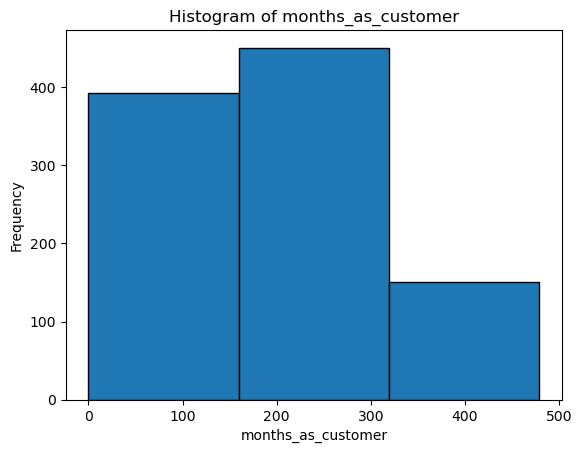

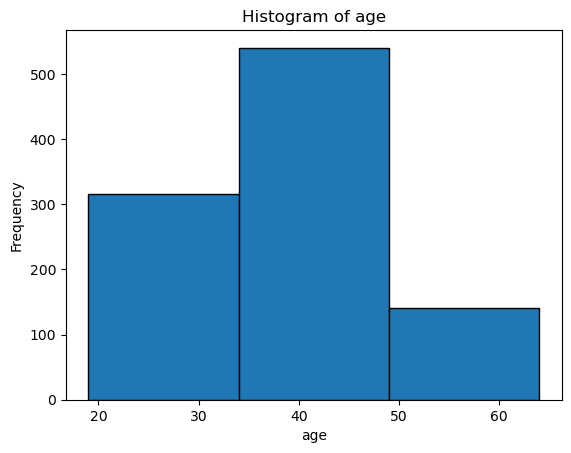

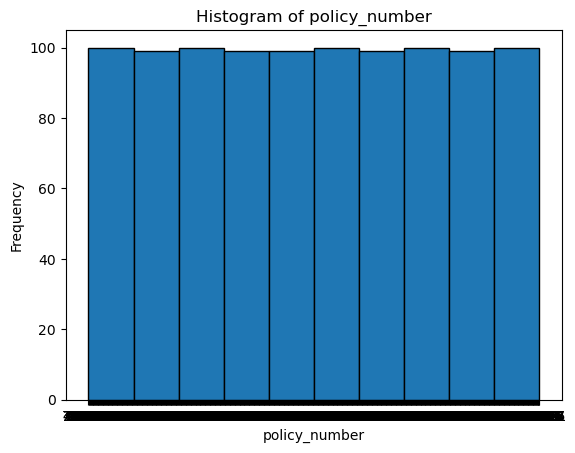

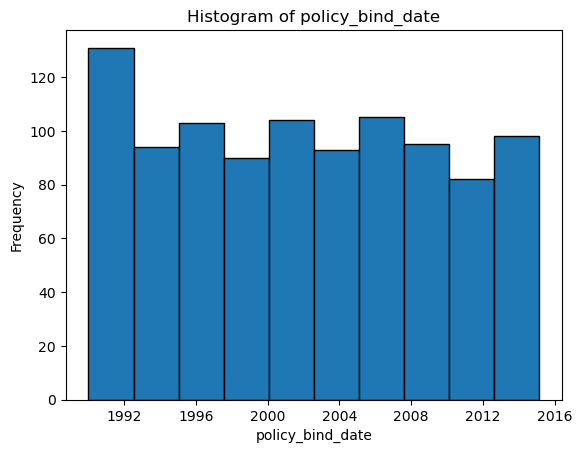

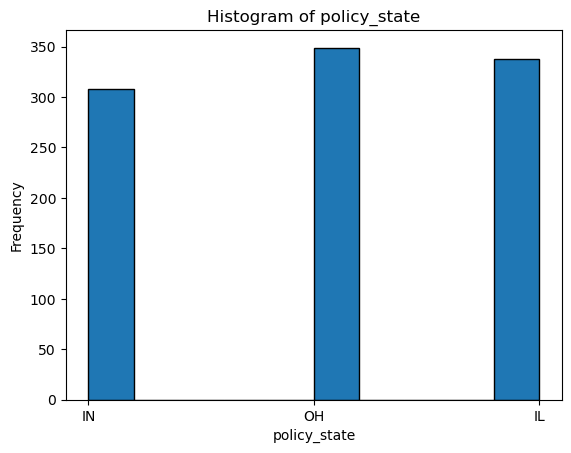

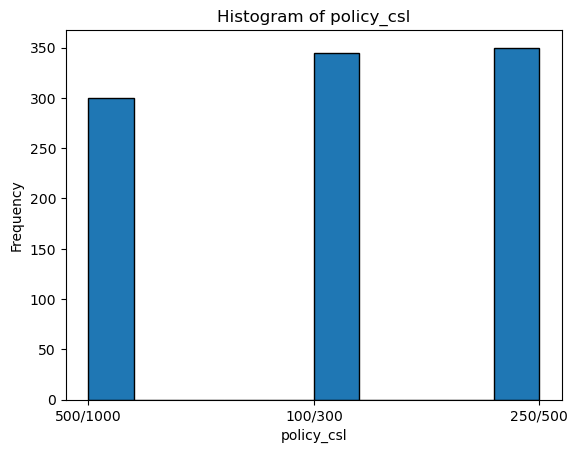

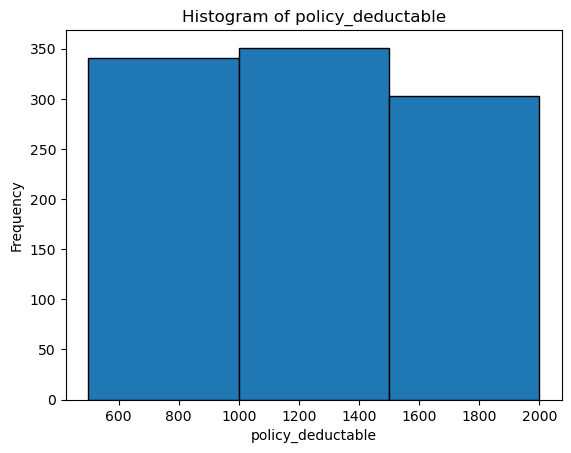

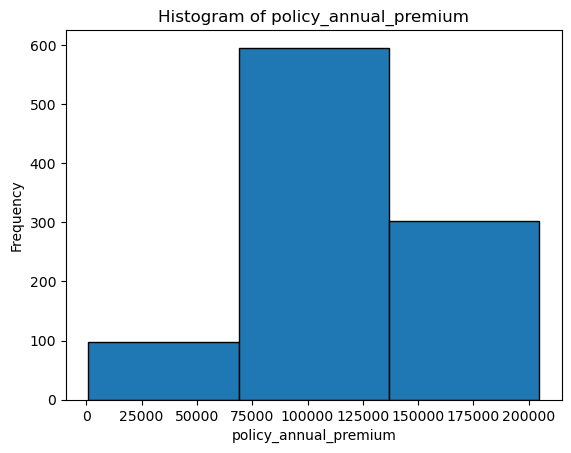

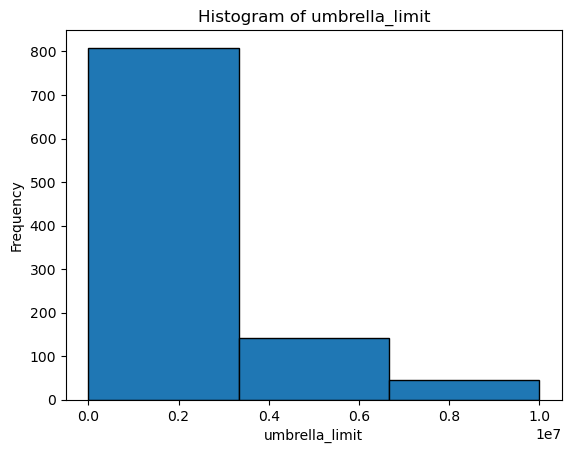

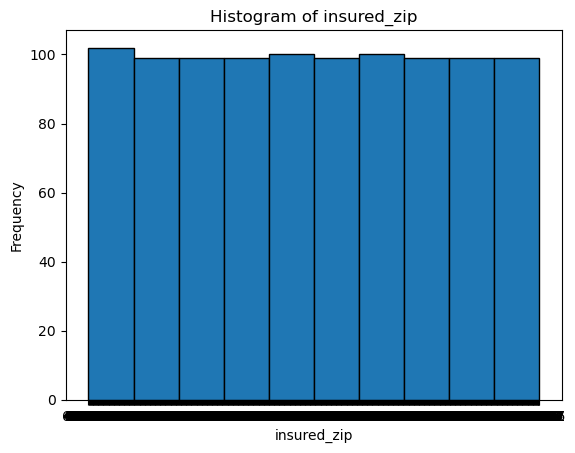

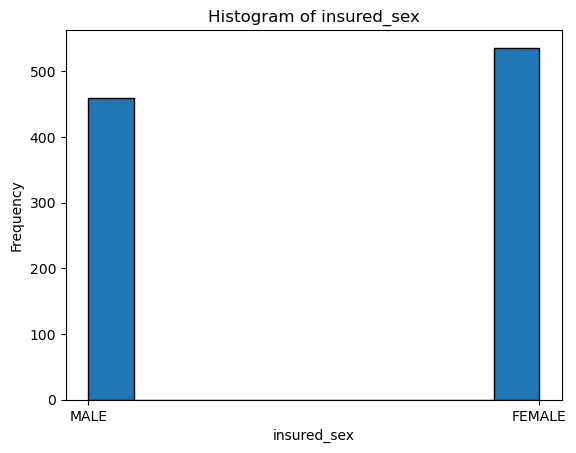

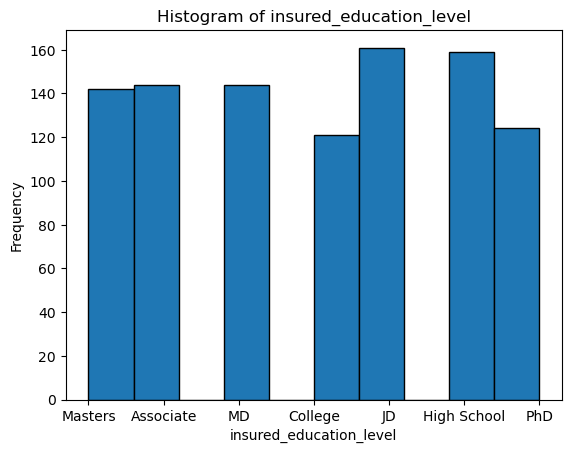

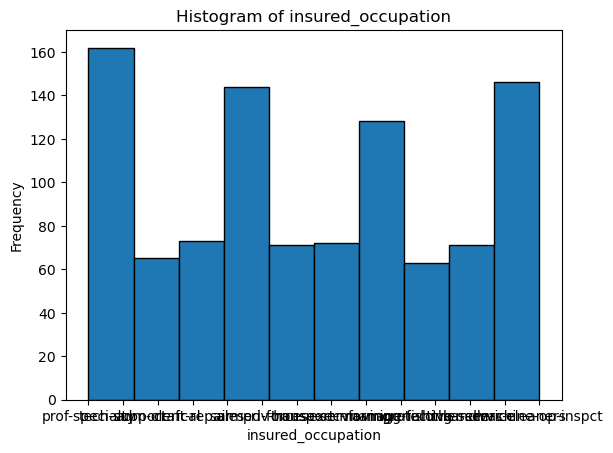

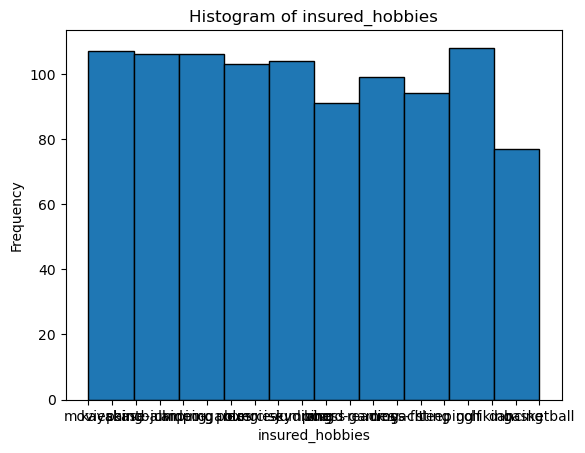

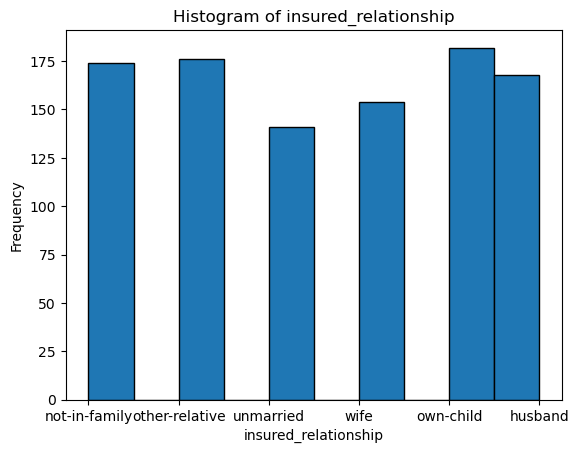

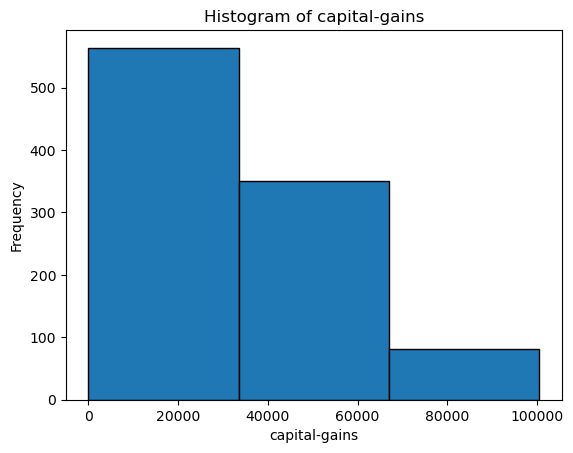

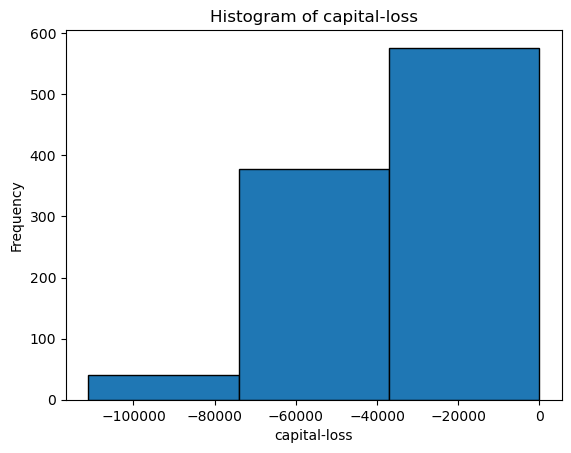

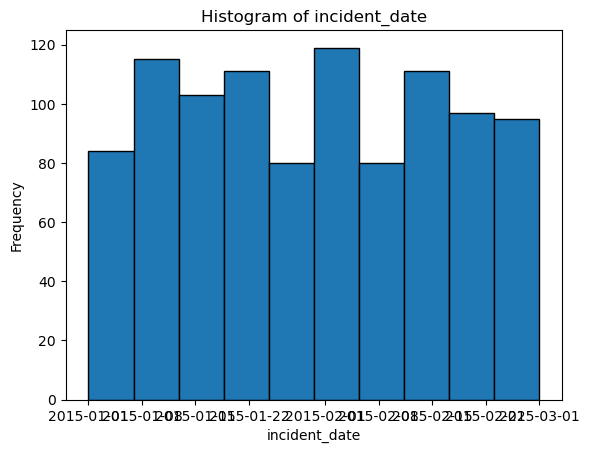

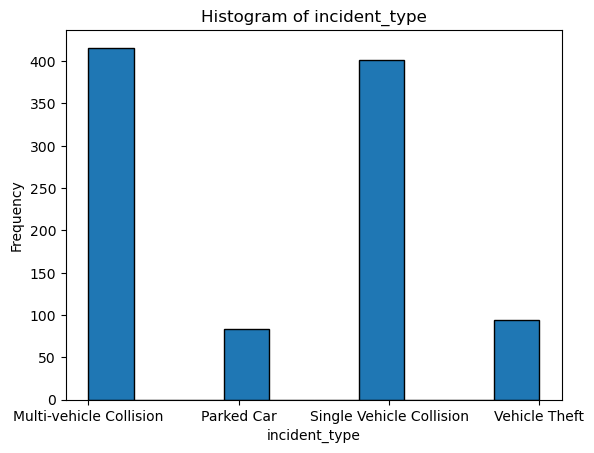

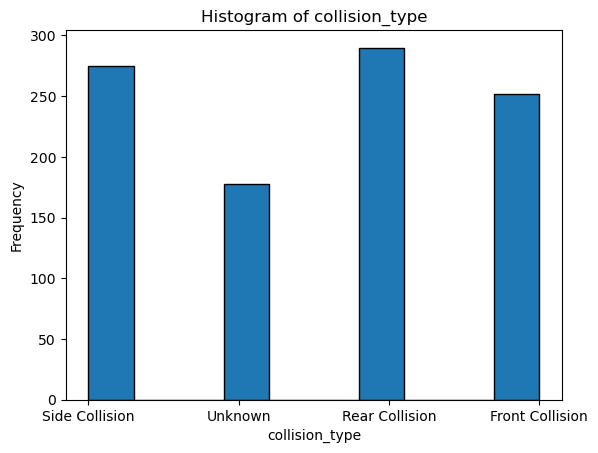

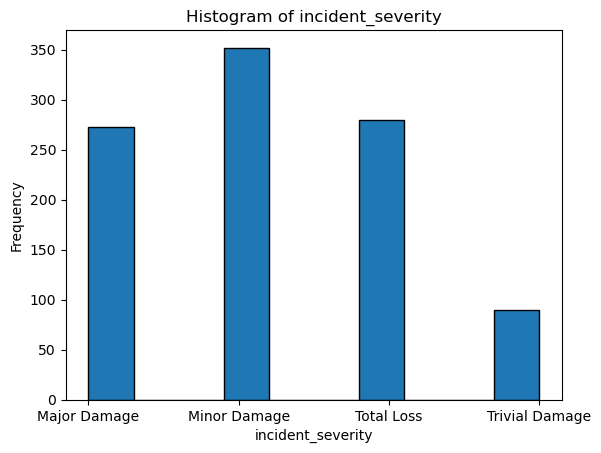

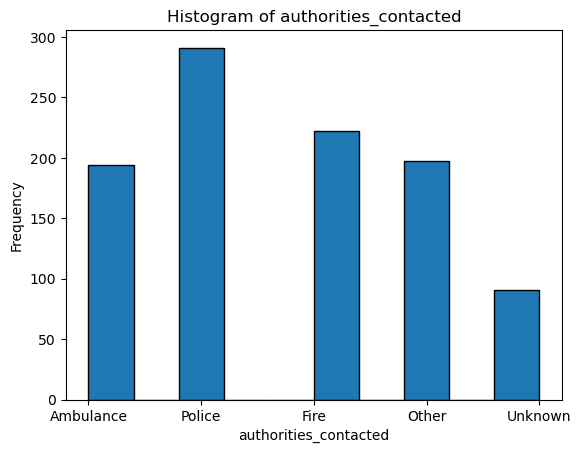

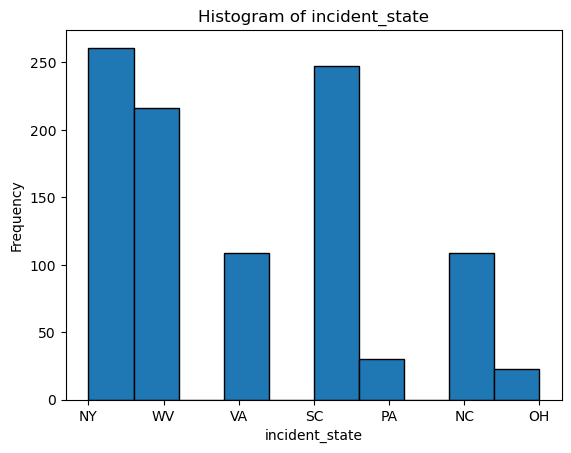

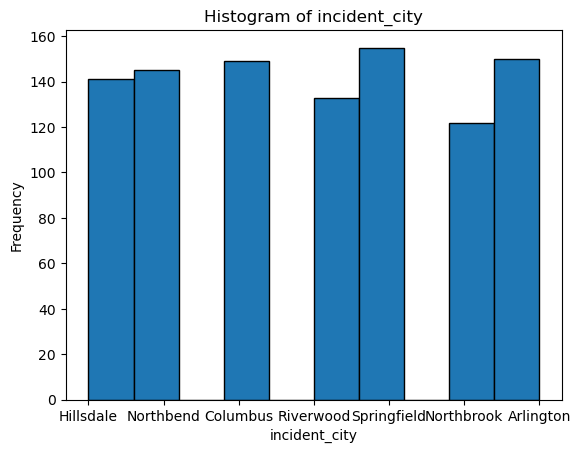

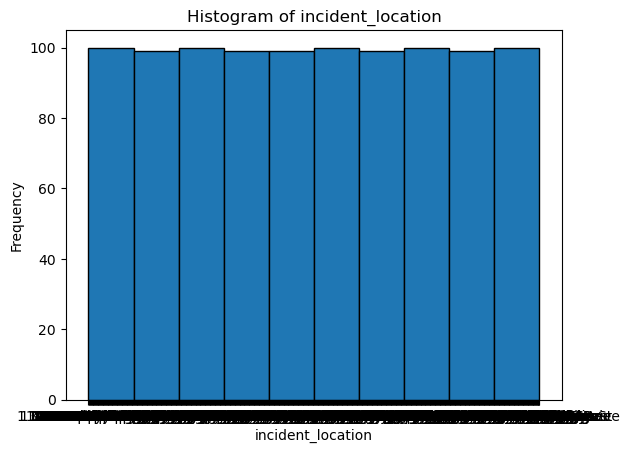

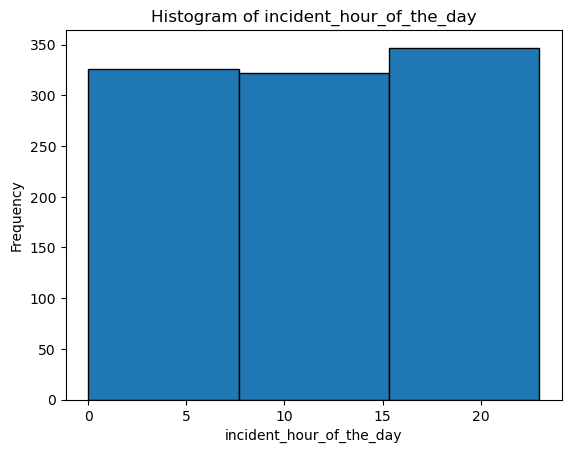

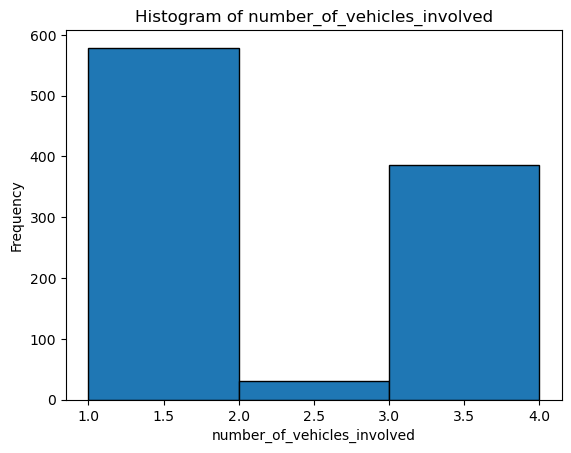

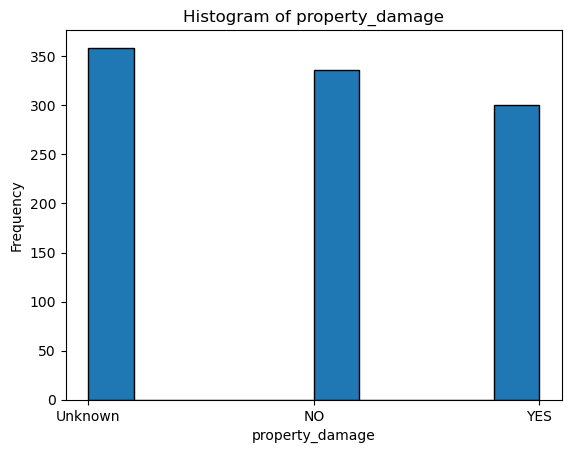

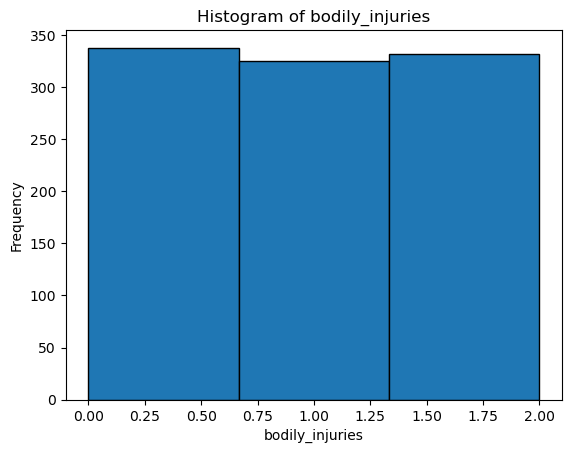

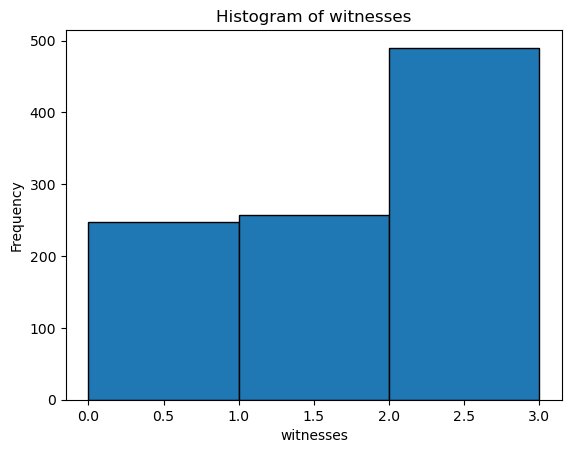

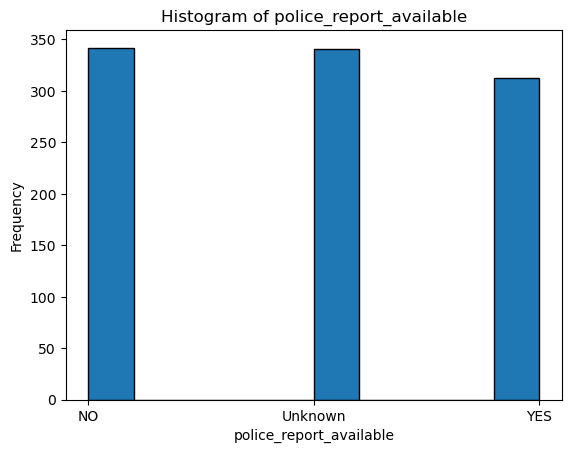

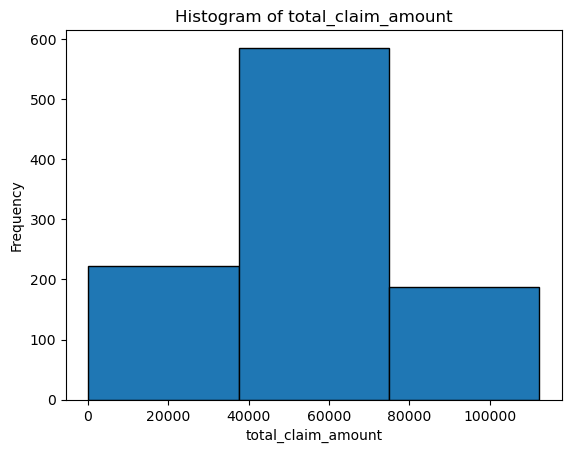

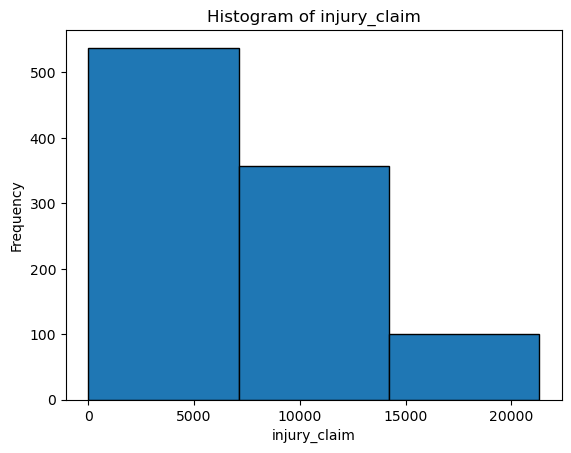

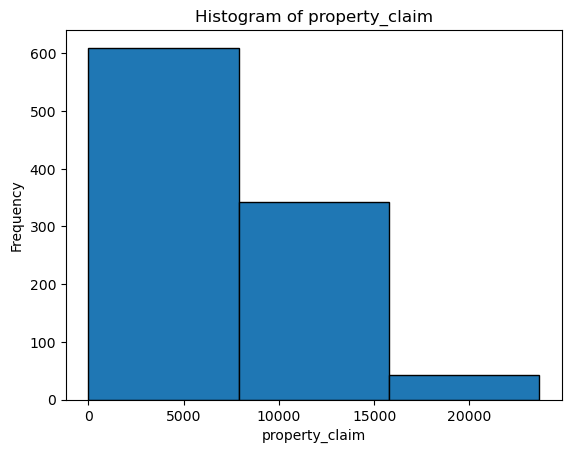

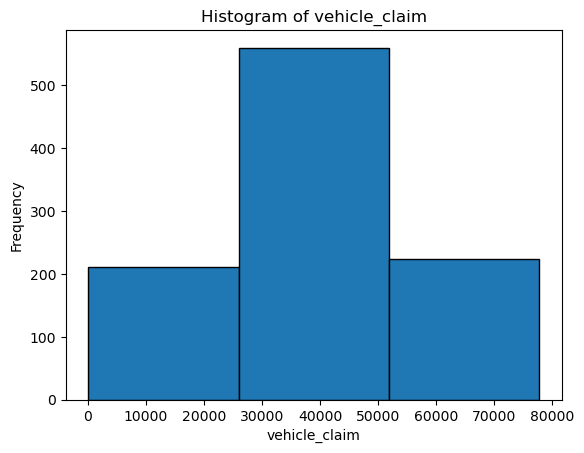

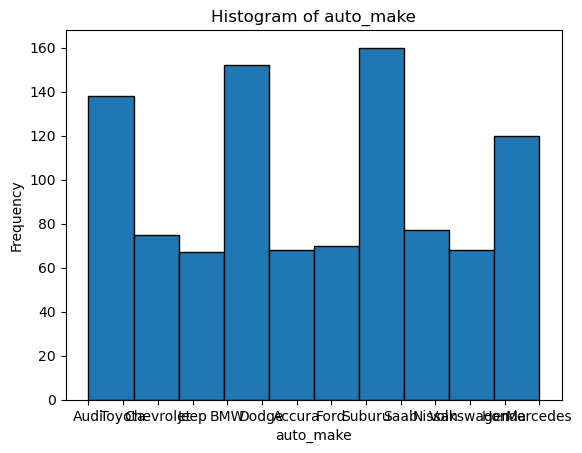

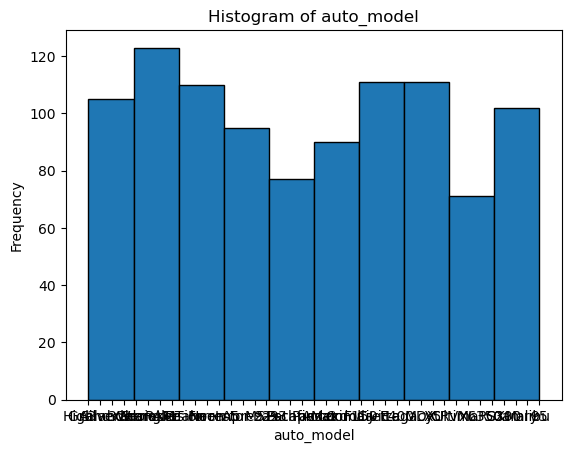

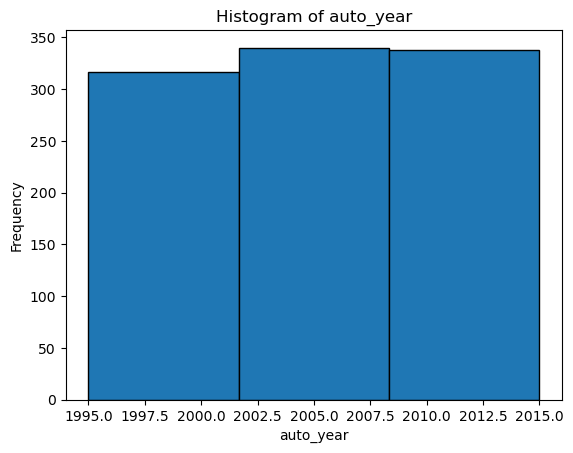

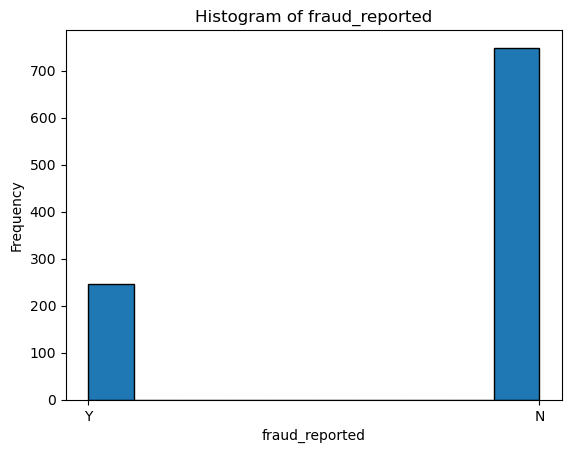

In [118]:
# Choose the column for the histogram
#column_name = 'age'

for  column_name in df.columns:
    if pd.api.types.is_numeric_dtype(df[column_name]):
        bins = 3
    else:
        bins = None
    # Plot the histogram
    plt.hist(df[column_name], bins= bins, edgecolor='black')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')

    # Display the histogram
    plt.show()

In [119]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [120]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,284,48,498140,1997-05-15,IN,500/1000,2000,76995,0,605486,...,NO,60940,5540,11080,44320,Audi,A3,2013,Y,Middle Aged
1,165,33,760179,2007-03-25,OH,100/300,1000,142714,0,446895,...,NO,2970,330,330,2310,Toyota,Highlander,2008,N,Middle Aged
2,121,31,439341,1991-07-20,IN,100/300,1000,114091,0,478388,...,Unknown,64300,6430,6430,51440,Chevrolet,Silverado,2002,Y,Middle Aged
3,297,47,272330,2009-11-29,IN,250/500,500,161665,7000000,456363,...,YES,44400,5550,5550,33300,Jeep,Grand Cherokee,1999,N,Middle Aged
4,299,42,337677,2008-07-20,OH,100/300,2000,143733,0,450339,...,NO,70400,12800,12800,44800,BMW,3 Series,2000,N,Middle Aged


In [121]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['customer_category'] = pd.cut(df_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [122]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,284,48,498140,1997-05-15,IN,500/1000,2000,76995,0,605486,...,60940,5540,11080,44320,Audi,A3,2013,Y,Middle Aged,Long-Term Client
1,165,33,760179,2007-03-25,OH,100/300,1000,142714,0,446895,...,2970,330,330,2310,Toyota,Highlander,2008,N,Middle Aged,Long-Term Client
2,121,31,439341,1991-07-20,IN,100/300,1000,114091,0,478388,...,64300,6430,6430,51440,Chevrolet,Silverado,2002,Y,Middle Aged,Established Client
3,297,47,272330,2009-11-29,IN,250/500,500,161665,7000000,456363,...,44400,5550,5550,33300,Jeep,Grand Cherokee,1999,N,Middle Aged,Long-Term Client
4,299,42,337677,2008-07-20,OH,100/300,2000,143733,0,450339,...,70400,12800,12800,44800,BMW,3 Series,2000,N,Middle Aged,Long-Term Client


## Creating New Features

In [123]:
df_new["Contract Years"] = df_new["months_as_customer"]/12

In [124]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,284,48,498140,1997-05-15,IN,500/1000,2000,76995,0,605486,...,5540,11080,44320,Audi,A3,2013,Y,Middle Aged,Long-Term Client,23.666667
1,165,33,760179,2007-03-25,OH,100/300,1000,142714,0,446895,...,330,330,2310,Toyota,Highlander,2008,N,Middle Aged,Long-Term Client,13.750000
2,121,31,439341,1991-07-20,IN,100/300,1000,114091,0,478388,...,6430,6430,51440,Chevrolet,Silverado,2002,Y,Middle Aged,Established Client,10.083333
3,297,47,272330,2009-11-29,IN,250/500,500,161665,7000000,456363,...,5550,5550,33300,Jeep,Grand Cherokee,1999,N,Middle Aged,Long-Term Client,24.750000
4,299,42,337677,2008-07-20,OH,100/300,2000,143733,0,450339,...,12800,12800,44800,BMW,3 Series,2000,N,Middle Aged,Long-Term Client,24.916667


## Feature Joining

In [125]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [126]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,284,48,498140,1997-05-15,IN,500/1000,2000,76995,0,605486,...,11080,44320,Audi,A3,2013,Y,Middle Aged,Long-Term Client,23.666667,1.822215e+06
1,165,33,760179,2007-03-25,OH,100/300,1000,142714,0,446895,...,330,2310,Toyota,Highlander,2008,N,Middle Aged,Long-Term Client,13.750000,1.962318e+06
2,121,31,439341,1991-07-20,IN,100/300,1000,114091,0,478388,...,6430,51440,Chevrolet,Silverado,2002,Y,Middle Aged,Established Client,10.083333,1.150418e+06
3,297,47,272330,2009-11-29,IN,250/500,500,161665,7000000,456363,...,5550,33300,Jeep,Grand Cherokee,1999,N,Middle Aged,Long-Term Client,24.750000,4.001209e+06
4,299,42,337677,2008-07-20,OH,100/300,2000,143733,0,450339,...,12800,44800,BMW,3 Series,2000,N,Middle Aged,Long-Term Client,24.916667,3.581347e+06


In [127]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [128]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,284,48,498140,1997-05-15,IN,500/1000,2000,76995,0,605486,...,44320,Audi,A3,2013,Y,Middle Aged,Long-Term Client,23.666667,1.822215e+06,1.761275e+06
1,165,33,760179,2007-03-25,OH,100/300,1000,142714,0,446895,...,2310,Toyota,Highlander,2008,N,Middle Aged,Long-Term Client,13.750000,1.962318e+06,1.959348e+06
2,121,31,439341,1991-07-20,IN,100/300,1000,114091,0,478388,...,51440,Chevrolet,Silverado,2002,Y,Middle Aged,Established Client,10.083333,1.150418e+06,1.086118e+06
3,297,47,272330,2009-11-29,IN,250/500,500,161665,7000000,456363,...,33300,Jeep,Grand Cherokee,1999,N,Middle Aged,Long-Term Client,24.750000,4.001209e+06,3.956809e+06
4,299,42,337677,2008-07-20,OH,100/300,2000,143733,0,450339,...,44800,BMW,3 Series,2000,N,Middle Aged,Long-Term Client,24.916667,3.581347e+06,3.510947e+06


## Saving the csv for late

In [129]:
df_new.to_csv('Advanced Features Claims Data.csv')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations

In [130]:
df_new['net_capital'] = df_new['capital-gains'] - df_new['capital-loss']
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,net_capital
0,284,48,498140,1997-05-15,IN,500/1000,2000,76995,0,605486,...,Audi,A3,2013,Y,Middle Aged,Long-Term Client,23.666667,1.822215e+06,1.761275e+06,44200
1,165,33,760179,2007-03-25,OH,100/300,1000,142714,0,446895,...,Toyota,Highlander,2008,N,Middle Aged,Long-Term Client,13.750000,1.962318e+06,1.959348e+06,93400
2,121,31,439341,1991-07-20,IN,100/300,1000,114091,0,478388,...,Chevrolet,Silverado,2002,Y,Middle Aged,Established Client,10.083333,1.150418e+06,1.086118e+06,51300
3,297,47,272330,2009-11-29,IN,250/500,500,161665,7000000,456363,...,Jeep,Grand Cherokee,1999,N,Middle Aged,Long-Term Client,24.750000,4.001209e+06,3.956809e+06,59500
4,299,42,337677,2008-07-20,OH,100/300,2000,143733,0,450339,...,BMW,3 Series,2000,N,Middle Aged,Long-Term Client,24.916667,3.581347e+06,3.510947e+06,25000
